In [1]:
from pyiron import Project

In [2]:
pr = Project("demo")

In [3]:
pr.path

'/home/jovyan/demo/'

# Structures

In [7]:
structure = pr.create.structure.ase.bulk("Fe", cubic=True)

In [8]:
structure

Fe: [0. 0. 0.]
Fe: [1.435 1.435 1.435]
pbc: [ True  True  True]
cell: 
Cell([2.87, 2.87, 2.87])

In [9]:
structure.plot3d()

NGLWidget()

In [10]:
structure_fcc = pr.create.structure.ase.bulk('Fe', a=3.6, crystalstructure="fcc", cubic=True)

In [11]:
structure_fcc

Fe: [0. 0. 0.]
Fe: [0.  1.8 1.8]
Fe: [1.8 0.  1.8]
Fe: [1.8 1.8 0. ]
pbc: [ True  True  True]
cell: 
Cell([3.6, 3.6, 3.6])

In [12]:
del structure_fcc[0]

In [13]:
structure_fcc[-1] = "C"

In [14]:
structure_fcc.set_repeat([2,2,2])

In [15]:
structure_fcc.plot3d()

NGLWidget()

# Calculation 

In [16]:
job = pr.create.job.Lammps(job_name="lmp_md")

In [17]:
job.working_directory

'/home/jovyan/demo/lmp_md_hdf5/lmp_md'

In [18]:
structure_bcc = pr.create.structure.ase.bulk("Fe", cubic=True)

In [19]:
structure_bcc.set_repeat([2,2,2])

In [20]:
job.structure = structure_bcc

In [21]:
job.view_potentials()

,Config,Filename,Model,Name,Species,Citations
40,"[pair_style eam/fs\n, pair_coeff * * Fe.eam.fs...",[potential_LAMMPS/1997--Ackland-G-J--Fe--LAMMP...,NISTiprpy,1997--Ackland-G-J--Fe--LAMMPS--ipr1,[Fe],[{'Ackland_1997': {'title': 'Computer simulati...
46,"[pair_style eam\n, pair_coeff 1 1 Fe_MeyerEnte...",[potential_LAMMPS/1998--Meyer-R--Fe--LAMMPS--i...,NISTiprpy,1998--Meyer-R--Fe--LAMMPS--ipr1,[Fe],[{'Meyer_1998': {'title': 'Martensite-austenit...
54,"[pair_style meam\n, pair_coeff * * library.mea...",[potential_LAMMPS/2001--Lee-B-J--Fe--LAMMPS--i...,NISTiprpy,2001--Lee-B-J--Fe--LAMMPS--ipr1,[Fe],[{'Lee_2001': {'title': 'Second nearest-neighb...
55,"[pair_style meam\n, pair_coeff * * library.mea...",[potential_LAMMPS/2001--Lee-B-J--Fe-Cr--LAMMPS...,NISTiprpy,2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1,"[Fe, Cr]",[{'Lee_2001': {'title': 'A semi-empirical atom...
77,"[pair_style eam/fs\n, pair_coeff * * Fe_2.eam....",[potential_LAMMPS/2003--Mendelev-M-I--Fe-2--LA...,NISTiprpy,2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3,[Fe],[{'Mendelev_2003': {'title': 'Development of n...
...,...,...,...,...,...,...
882,[pair_style kim Sim_LAMMPS_MEAM_KimJungLee_200...,[],OPENKIM,Sim_LAMMPS_MEAM_KimJungLee_2009_FeTiC__SM_5310...,"[Fe, Ti, C]",[{'Hyun-Kyu_2009': {'title': 'Modified embedde...
886,[pair_style kim Sim_LAMMPS_MEAM_LiyanageKimHou...,[],OPENKIM,Sim_LAMMPS_MEAM_LiyanageKimHouze_2014_FeC__SM_...,"[Fe, C]","[{'I._2014': {'title': 'Structural, elastic, a..."
904,[pair_style kim Sim_LAMMPS_ReaxFF_AryanpourVan...,[],OPENKIM,Sim_LAMMPS_ReaxFF_AryanpourVanDuinKubicki_2010...,"[Fe, H, O]",[{'Masoud_2010': {'title': 'Development of a R...
916,[pair_style kim Sim_LAMMPS_TersoffZBL_Byggmast...,[],OPENKIM,Sim_LAMMPS_TersoffZBL_ByggmastarGranberg_2020_...,[Fe],[{'J._2020': {'title': 'Dynamical Stability of...


In [22]:
pot = job.list_potentials()[0]

In [24]:
job.potential = pot

In [25]:
job.calc_md(temperature=500, n_ionic_steps=10000)

In [26]:
job.server.cores = 2

In [27]:
# job.server.queue

In [28]:
job.run()

The job lmp_md was saved and received the ID: 1


In [29]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,Fe16,lmp_md,/lmp_md,/home/jovyan/,demo/,2021-03-24 15:23:18.983070,2021-03-24 15:23:20.687641,1.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#2,Lammps,0.1,None,None


# Technical details

In [30]:
job.executable

'/srv/conda/envs/notebook/share/pyiron/lammps/bin/run_lammps_2020.03.03_mpi.sh'

In [31]:
!cat $job.executable

#!/bin/bash
mpiexec -n $1 --oversubscribe lmp_mpi -in control.inp;


In [32]:
job.working_directory

'/home/jovyan/demo/lmp_md_hdf5/lmp_md'

In [33]:
job.decompress()

In [34]:
job["output/generic"]

{'groups': [], 'nodes': ['cells', 'energy_pot', 'energy_tot', 'forces', 'indices', 'positions', 'pressures', 'steps', 'temperature', 'unwrapped_positions', 'velocities', 'volume']}

# Plotting the results 

In [35]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'MD steps')

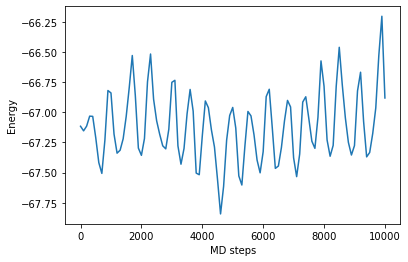

In [36]:
plt.plot(job["output/generic/steps"], job["output/generic/energy_tot"])
plt.ylabel("Energy")
plt.xlabel("MD steps")

Text(0.5, 0, 'MD steps')

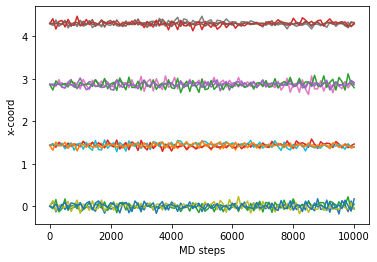

In [37]:
plt.plot(job["output/generic/steps"], job["output/generic/unwrapped_positions"][:,:,0])
plt.ylabel("x-coord")
plt.xlabel("MD steps")

In [41]:
job.animate_structure()

NGLWidget(max_frame=100)

# Restart

In [39]:
job.input.control

,Parameter,Value,Comment
0,units,metal,
1,dimension,3,
2,boundary,p p p,
3,atom_style,atomic,
4,read_data,structure.inp,
5,include,potential.inp,
6,fix___ensemble,all nvt temp 500.0 500.0 0.1,
7,variable___dumptime,equal 100,
8,variable___thermotime,equal 100,
9,timestep,0.001,


In [40]:
job.input.control["run"] = 20000

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_base/generic/parameters.py:284: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  "The input in GenericParameters changed, while the state of the job was already finished."


In [ ]:
# job.write_restart_file

In [ ]:
# job.restart?

# Lammps output files 

In [38]:
job["log.lammps"]

['LAMMPS (10 Feb 2021)\n',
 'OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:94)\n',
 '  using 1 OpenMP thread(s) per MPI task\n',
 'units metal\n',
 'dimension 3\n',
 'boundary p p p\n',
 'atom_style atomic\n',
 'read_data structure.inp\n',
 'Reading data file ...\n',
 '  orthogonal box = (0.0000000 0.0000000 0.0000000) to (5.7400000 5.7400000 5.7400000)\n',
 '  1 by 1 by 2 MPI processor grid\n',
 '  reading atoms ...\n',
 '  16 atoms\n',
 '  read_data CPU = 0.006 seconds\n',
 'include potential.inp\n',
 'pair_style eam/fs\n',
 'pair_coeff * * Fe.eam.fs Fe\n',
 'fix ensemble all nvt temp 500.0 500.0 0.1\n',
 'variable dumptime  equal 100\n',
 'variable thermotime  equal 100\n',
 'timestep 0.001\n',
 'velocity all create 1000.0 86897 dist gaussian\n',
 'dump 1 all custom ${dumptime} dump.out id type xsu ysu zsu fx fy fz vx vy vz\n',
 'dump 1 all custom 100 dump.out id type xsu ysu zsu fx fy fz vx vy vz\n',
 'dump_modify 1 sort id format line "%d %d %20.15g